In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#cities_df = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#print(lats)
# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
print(len(cities))

#print(cities[1])

In [3]:
#Create an empty dataframe
cities_df = pd.DataFrame()

#Add cities from cities list into dataframe
cities_df['City'] = cities

# Set up additional columns to hold information
cities_df['Country'] = ""
cities_df['Date_Checked']= ""
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temp(K)'] = ""
cities_df['MaxTemp(K)'] = ""
#cities_df['Temp(F)'] = ""
cities_df['Humidity(%)'] = ""
cities_df['Cloudiness(%)'] = ""
cities_df['Wind_Speed(meter/sec)'] = ""
#cities_df['Wind_Speed(mph)'] = ""

cities_df.head()



,City,Country,Date_Checked,Latitude,Longitude,Temp(K),MaxTemp(K),Humidity(%),Cloudiness(%),Wind_Speed(meter/sec)
0,hihifo,,,,,,,,,
1,nome,,,,,,,,,
2,ust-maya,,,,,,,,,
3,jamestown,,,,,,,,,
4,georgetown,,,,,,,,,


# Perform API Calls and Convert Raw Data to DataFrame 

In [4]:
# Target city
#target_city = cities[1]
#target_city = (f'"{cities[1]}"')
#print(target_city)

#Hard code target URL to check if API key is working
target_url = ('http://api.openweathermap.org/data/2.5/weather?q=sioux falls&APPID=2ada45f7c6c694a273cb754d33d8e8b3')

# Build the endpoint URL
#target_url = ('http://api.openweathermap.org/data/2.5/'
    #'weather?q={0}&APPID={1}').format(target_city, api_key)
#print(target_url)

# Run a request to endpoint and convert result to json
weather_data = requests.get(target_url).json()

# Print the json
#print(weather_data)

print(json.dumps(weather_data, indent=4, sort_keys=True))



{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 43.55,
        "lon": -96.7
    },
    "dt": 1553631363,
    "id": 5231851,
    "main": {
        "humidity": 61,
        "pressure": 1024,
        "temp": 282.92,
        "temp_max": 284.82,
        "temp_min": 281.15
    },
    "name": "Sioux Falls",
    "sys": {
        "country": "US",
        "id": 4803,
        "message": 0.004,
        "sunrise": 1553602767,
        "sunset": 1553647522,
        "type": 1
    },
    "visibility": 16093,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 5.7
    }
}


In [5]:
#print(weather_data["name"])
#print(weather_data["wind"]["speed"])

# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():

    target_city = row["City"]
    
    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {target_city}.")
    
    target_url = ('http://api.openweathermap.org/data/2.5/'
    'weather?q={0}&APPID={1}').format(target_city, api_key)
    
   # Run a request to endpoint and convert result to json
    weather_data = requests.get(target_url).json()

    # Print the json
    #print(weather_data)
    #print(json.dumps(weather_data, indent=4, sort_keys=True))
        
    try:
        #print(f"Finding {target_city} data with  latitude {weather_data['coord']['lat']}.")
        
        cities_df.loc[index, 'City'] = weather_data['name']
        cities_df.loc[index, 'Country'] = weather_data['sys']['country']
        cities_df.loc[index, 'Date_Checked'] = weather_data['dt']
        cities_df.loc[index, 'Latitude'] = weather_data['coord']['lat']
        cities_df.loc[index, 'Longitude'] = weather_data['coord']['lon']
        cities_df.loc[index, 'Temp(K)'] = weather_data['main']['temp']
        cities_df.loc[index, "MaxTemp(K)"] = weather_data['main']['temp_max']
        cities_df.loc[index, 'Humidity(%)'] = weather_data['main']['humidity']
        cities_df.loc[index, 'Cloudiness(%)'] = weather_data['clouds']['all']
        cities_df.loc[index, 'Wind_Speed(meter/sec)'] = weather_data['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
        
           
    
cities_df
    
    




Retrieving Results for Index 0: hihifo.
Missing field/result... skipping.
------------
Retrieving Results for Index 1: nome.
------------
Retrieving Results for Index 2: ust-maya.
------------
Retrieving Results for Index 3: jamestown.
------------
Retrieving Results for Index 4: georgetown.
------------
Retrieving Results for Index 5: severo-kurilsk.
------------
Retrieving Results for Index 6: new norfolk.
------------
Retrieving Results for Index 7: vaini.
------------
Retrieving Results for Index 8: hithadhoo.
------------
Retrieving Results for Index 9: necochea.
------------
Retrieving Results for Index 10: bara.
------------
Retrieving Results for Index 11: bambous virieux.
------------
Retrieving Results for Index 12: ponta delgada.
------------
Retrieving Results for Index 13: tiksi.
------------
Retrieving Results for Index 14: katsuura.
------------
Retrieving Results for Index 15: panama city.
------------
Retrieving Results for Index 16: carnarvon.
------------
Retrieving 

------------
Retrieving Results for Index 140: caravelas.
------------
Retrieving Results for Index 141: esperance.
------------
Retrieving Results for Index 142: ngunguru.
------------
Retrieving Results for Index 143: amderma.
Missing field/result... skipping.
------------
Retrieving Results for Index 144: puerto ayora.
------------
Retrieving Results for Index 145: qaanaaq.
------------
Retrieving Results for Index 146: eslamshahr.
------------
Retrieving Results for Index 147: butaritari.
------------
Retrieving Results for Index 148: salalah.
------------
Retrieving Results for Index 149: bredasdorp.
------------
Retrieving Results for Index 150: russell.
------------
Retrieving Results for Index 151: sao joao da barra.
------------
Retrieving Results for Index 152: santa maria.
------------
Retrieving Results for Index 153: tutoia.
------------
Retrieving Results for Index 154: shangzhi.
------------
Retrieving Results for Index 155: sitka.
------------
Retrieving Results for Ind

Missing field/result... skipping.
------------
Retrieving Results for Index 273: barpeta.
------------
Retrieving Results for Index 274: the pas.
------------
Retrieving Results for Index 275: manokwari.
------------
Retrieving Results for Index 276: hovd.
------------
Retrieving Results for Index 277: kuche.
Missing field/result... skipping.
------------
Retrieving Results for Index 278: bemidji.
------------
Retrieving Results for Index 279: guerrero negro.
------------
Retrieving Results for Index 280: kaura namoda.
------------
Retrieving Results for Index 281: san rafael del sur.
------------
Retrieving Results for Index 282: nanning.
------------
Retrieving Results for Index 283: lavrentiya.
------------
Retrieving Results for Index 284: porto santo.
Missing field/result... skipping.
------------
Retrieving Results for Index 285: saquarema.
------------
Retrieving Results for Index 286: hopkinsville.
------------
Retrieving Results for Index 287: akureyri.
------------
Retrieving

------------
Retrieving Results for Index 405: sembakung.
------------
Retrieving Results for Index 406: quatre cocos.
------------
Retrieving Results for Index 407: stornoway.
Missing field/result... skipping.
------------
Retrieving Results for Index 408: peru.
------------
Retrieving Results for Index 409: rangpur.
------------
Retrieving Results for Index 410: asyut.
------------
Retrieving Results for Index 411: karla.
------------
Retrieving Results for Index 412: gilgit.
------------
Retrieving Results for Index 413: mombetsu.
------------
Retrieving Results for Index 414: ko samui.
------------
Retrieving Results for Index 415: asau.
Missing field/result... skipping.
------------
Retrieving Results for Index 416: vila.
------------
Retrieving Results for Index 417: vestmannaeyjar.
------------
Retrieving Results for Index 418: la orilla.
------------
Retrieving Results for Index 419: aklavik.
------------
Retrieving Results for Index 420: ust-bolsheretsk.
Missing field/result..

------------
Retrieving Results for Index 541: bekhtery.
------------
Retrieving Results for Index 542: skalistyy.
Missing field/result... skipping.
------------
Retrieving Results for Index 543: shwebo.
------------
Retrieving Results for Index 544: manga.
------------
Retrieving Results for Index 545: dukat.
------------
Retrieving Results for Index 546: san cristobal.
------------
Retrieving Results for Index 547: vestbygda.
Missing field/result... skipping.
------------
Retrieving Results for Index 548: acapulco.
------------
Retrieving Results for Index 549: kalmunai.
------------
Retrieving Results for Index 550: tecoanapa.
------------
Retrieving Results for Index 551: zambrano.
------------
Retrieving Results for Index 552: ous.
------------
Retrieving Results for Index 553: tiznit.
------------
Retrieving Results for Index 554: tsihombe.
Missing field/result... skipping.
------------
Retrieving Results for Index 555: kawana waters.
Missing field/result... skipping.
-----------

,City,Country,Date_Checked,Latitude,Longitude,Temp(K),MaxTemp(K),Humidity(%),Cloudiness(%),Wind_Speed(meter/sec)
0,hihifo,,,,,,,,,
1,Nome,US,1553631629,30.04,-94.42,296.96,298.71,40,1,4.26
2,Ust-Maya,RU,1553631772,60.42,134.54,257.338,257.338,79,48,2.01
3,Jamestown,AU,1553631731,-33.21,138.6,279.188,279.188,80,0,2.46
4,Georgetown,GY,1553626800,6.8,-58.16,303.15,303.15,58,75,5.1
5,Severo-Kurilsk,RU,1553631747,50.68,156.12,270.338,270.338,100,36,3.81
6,New Norfolk,AU,1553631475,-42.78,147.06,279.02,282.15,70,0,3.1
7,Vaini,IN,1553631738,15.34,74.49,294.588,294.588,93,20,0.76
8,Hithadhoo,MV,1553631743,-0.6,73.08,301.888,301.888,100,80,2.06
9,Necochea,AR,1553631107,-38.55,-58.74,290.93,290.93,56,0,2.68


In [6]:
#Replace empty space with NaN
new_cities_df = cities_df.replace(r'^\s*$', np.nan, regex=True)
#new_cities_df
#Drop rows with missing values
new_cities_df_2 = new_cities_df.dropna(axis = 0, how = "any")
new_cities_df_2


,City,Country,Date_Checked,Latitude,Longitude,Temp(K),MaxTemp(K),Humidity(%),Cloudiness(%),Wind_Speed(meter/sec)
1,Nome,US,1.553632e+09,30.04,-94.42,296.960,298.710,40.0,1.0,4.26
2,Ust-Maya,RU,1.553632e+09,60.42,134.54,257.338,257.338,79.0,48.0,2.01
3,Jamestown,AU,1.553632e+09,-33.21,138.60,279.188,279.188,80.0,0.0,2.46
4,Georgetown,GY,1.553627e+09,6.80,-58.16,303.150,303.150,58.0,75.0,5.10
5,Severo-Kurilsk,RU,1.553632e+09,50.68,156.12,270.338,270.338,100.0,36.0,3.81
6,New Norfolk,AU,1.553631e+09,-42.78,147.06,279.020,282.150,70.0,0.0,3.10
7,Vaini,IN,1.553632e+09,15.34,74.49,294.588,294.588,93.0,20.0,0.76
8,Hithadhoo,MV,1.553632e+09,-0.60,73.08,301.888,301.888,100.0,80.0,2.06
9,Necochea,AR,1.553631e+09,-38.55,-58.74,290.930,290.930,56.0,0.0,2.68
10,Bara,NG,1.553632e+09,10.41,10.60,299.888,299.888,24.0,0.0,4.21


In [10]:
#Convert Temperature from Kelvin to Fahrenheit

temp_fahrenheit = []
maxtemp_fahrenheit = []
wind_speed_mph = []

for values in new_cities_df_2["Temp(K)"]:
    current_temp_Kelvin = values
    current_temp_Fahrenheit = (current_temp_Kelvin - 273.15) *(9/5)+32
    #print(current_Fahrenheit)
    temp_fahrenheit.append(current_temp_Fahrenheit)

for values in new_cities_df_2["MaxTemp(K)"]:
    current_maxtemp_Kelvin = values
    current_maxtemp_Fahrenheit = (current_maxtemp_Kelvin - 273.15) *(9/5)+32
    #print(current_Fahrenheit)
    maxtemp_fahrenheit.append(current_maxtemp_Fahrenheit)

for values in new_cities_df_2["Wind_Speed(meter/sec)"]:
    current_wind_speed_ms = values
    current_wind_speed_mph = current_wind_speed_ms * 2.237
    wind_speed_mph.append(current_wind_speed_mph)

rounded_temp_fahrenheit = [round(x) for x in temp_fahrenheit]
rounded_maxtemp_fahrenheit = [round(x) for x in maxtemp_fahrenheit]
rounded_wind_spead_mph = [round(x) for x in wind_speed_mph]
#print(rounded_fahrenheit)

new_cities_df_2['Temp(F)'] = rounded_temp_fahrenheit
new_cities_df_2['MaxTemp(F)'] = rounded_maxtemp_fahrenheit
new_cities_df_2['Wind_Speed(mph)'] = rounded_maxtemp_fahrenheit
new_cities_df_2


C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,City,Country,Date_Checked,Latitude,Longitude,Temp(K),MaxTemp(K),Humidity(%),Cloudiness(%),Wind_Speed(meter/sec),Temp(F),MaxTemp(F),Wind_Speed(mph)
1,Nome,US,1.553632e+09,30.04,-94.42,296.960,298.710,40.0,1.0,4.26,75,78,78
2,Ust-Maya,RU,1.553632e+09,60.42,134.54,257.338,257.338,79.0,48.0,2.01,4,4,4
3,Jamestown,AU,1.553632e+09,-33.21,138.60,279.188,279.188,80.0,0.0,2.46,43,43,43
4,Georgetown,GY,1.553627e+09,6.80,-58.16,303.150,303.150,58.0,75.0,5.10,86,86,86
5,Severo-Kurilsk,RU,1.553632e+09,50.68,156.12,270.338,270.338,100.0,36.0,3.81,27,27,27
6,New Norfolk,AU,1.553631e+09,-42.78,147.06,279.020,282.150,70.0,0.0,3.10,43,48,48
7,Vaini,IN,1.553632e+09,15.34,74.49,294.588,294.588,93.0,20.0,0.76,71,71,71
8,Hithadhoo,MV,1.553632e+09,-0.60,73.08,301.888,301.888,100.0,80.0,2.06,84,84,84
9,Necochea,AR,1.553631e+09,-38.55,-58.74,290.930,290.930,56.0,0.0,2.68,64,64,64
10,Bara,NG,1.553632e+09,10.41,10.60,299.888,299.888,24.0,0.0,4.21,80,80,80


# Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
    Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


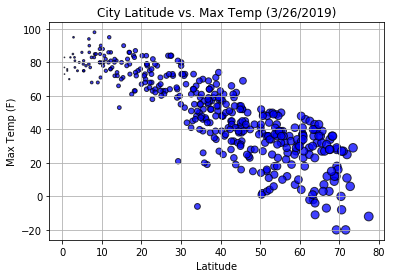

In [12]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
x_axis = new_cities_df_2["Latitude"]
y_axis = new_cities_df_2["MaxTemp(F)"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)


#plt.legend(label)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('City Latitude vs. Max Temp (3/26/2019)')

# Save Figure
plt.savefig("MaxTempvsLatitude.png")
plt.show()

plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot